In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install ckiptagger env

In [14]:
!pip3 -q install ckiptagger
!pip3 -q install gdown
!pip3 -q install tensorflow-gpu
'''Initializaing data structure MSW'''

'Initializaing data structure MSW'

In [15]:
!gdown --id 1_k1H_JyXwyRoRFcXa_YKGXgqxOg1Kx5a 

Downloading...
From: https://drive.google.com/uc?id=1_k1H_JyXwyRoRFcXa_YKGXgqxOg1Kx5a
To: /content/MSW.py
100% 642/642 [00:00<00:00, 308kB/s]


In [16]:
W2VDIR = '/content/drive/MyDrive/110-1ComSem_final/w2v_resources'

In [17]:
import pickle  
with open (f'{W2VDIR}/MSW_leveled_list3.pkl', 'rb') as F:
    leveled_list = pickle.load(F)

In [8]:
categoryDicts = {}
for msw in leveled_list:
  categoryDicts[msw.word] = {}
  for sensedict in msw.senses:
    senseidx = sensedict['senseidx']
    category = sensedict['category']
    categoryDicts[msw.word][senseidx] = category
'''
import pickle
with open (f'{W2VDIR}/CategoryDicts.pkl', 'wb') as f:
  pickle.dump(categoryDicts, f)
'''

In [18]:
from ckiptagger import data_utils
%load_ext autoreload
%autoreload 2

In [19]:
# Sometimes the link inside data_utils is broken:
# default     file_id = "1efHsY16pxK0lBD2gYCgCTnv1Swstq771"
# alternative file_id = '16jCrS27EVCOFYWWx9Z0ByFG_Y-Df7CiJ'
data_utils.download_data_gdown("./")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
100%|██████████| 1.88G/1.88G [00:15<00:00, 120MB/s] 


In [20]:
# Set gpu env 
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from ckiptagger import construct_dictionary, WS
# ws = WS("./data", disable_cuda=False)
ws = WS("./data", disable_cuda=False)

/usr/local/lib/python3.7/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=initializer)


### Seg the gloss

save the seg_gloss and essential info into Gloss_Dict

像是號、龍、虹，這類單字詞
常常會有小號被切開，恐龍被切開的情況QQ
應該在最一開始的詞表裡就避免（CS-3.0）
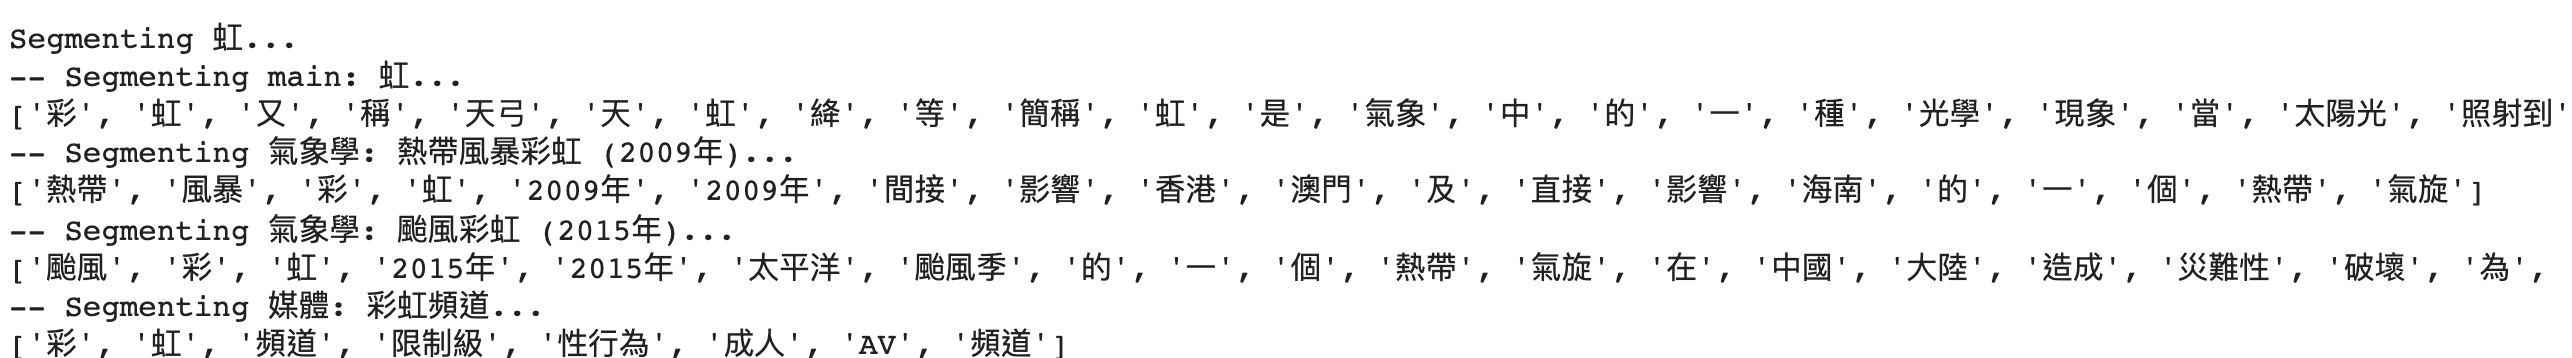

In [21]:
import re 
punc = " ！？｡。＂＃＄％＆＇（()）＊＋，－／：；＜＝＞＠［＼］＾＿｀〈〉｛｜｝～«»《》｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
punc+="\n"
punc+="\t"
def clean(token_list):
  new_list = []
  for token in token_list:
    token = ''.join(x for x in list(token) if x not in punc)
    if len(token) != 0:
      new_list.append(token)
  return new_list

In [ ]:
# 喔夭壽有些sensename會撞名==...
'''
atmosphere = leveled_list[9]
import json
with open (f'{W2VDIR}/Gloss_dict.json', 'r') as fp:
      gloss = json.load(fp)
gloss['大氣層']['sensename'] 
gloss[f'{word}'][f'{sensename}']['gloss'] =  seg_gloss
gloss[f'{word}'][f'{sensename}']['category'] =  cat
gloss[f'{word}'][f'{sensename}']['senseidx'] = sense['senseidx'] # 
gloss[f'{word}'][f'{sensename}']['Gemb'] = '' # array, will be filled later 
'''

9


In [23]:
import json
import re 
gloss = dict()
for idx, msw in enumerate(leveled_list):
    word = msw.word
    print(f'\nSegmenting {word}...')
    # print(senses)
    coerce_dict = {}
    coerce_dict[word] = 2
    coerce_dict = construct_dictionary(coerce_dict)
    gloss[f'{word}'] = dict()
    for sense in msw.senses: 
          cat = sense['category']
          senseid = sense['senseidx']
          gloss[f'{word}'][f'{senseid}'] = dict()
          # split to sentences
          # print(text_list)
          print(f'-- Segmenting {cat}: {senseid}...', sep = '   ')
          text_list = [sense['gloss']]
          seg_gloss = ws(
              text_list,
              sentence_segmentation = True, # To consider delimiters
              segment_delimiter_set = {",", "。", ":", "?", "!", ";", "\n", "\t"}, # This is the defualt set of delimiters
              # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
              coerce_dictionary = coerce_dict, # words in this dictionary are forced
          )[0]
          seg_gloss = clean(seg_gloss)
          print(seg_gloss) 
          gloss[f'{word}'][f'{senseid}']['sensename'] =  sense['sense']
          gloss[f'{word}'][f'{senseid}']['gloss'] =  seg_gloss
          gloss[f'{word}'][f'{senseid}']['category'] =  cat
          gloss[f'{word}'][f'{senseid}']['senseidx'] = sense['senseidx'] # not necessary though
          gloss[f'{word}'][f'{senseid}']['Gemb'] = '' # array, will be filled later 


Segmenting 八仙...
-- Segmenting main: 1...
['八仙', '是', '道教', '中', '的', '八', '位', '神仙', '分別', '代表', '男女老幼', '貧賤', '富貴', '八', '種', '不同', '的', '人羣', '由於', '八仙', '均', '為', '凡人', '得道', '所以', '個性', '與', '百']
-- Segmenting 淮南八仙: 2...
['1', '淮南', '八仙']
-- Segmenting 地名: 3...
['八仙', '裏', '位於', '中華民國', '臺北市', '北投區']
-- Segmenting 地名: 4...
['八仙', '鎮', '位於', '中華', '人民', '共和國', '陝西省', '安康市', '平利縣']
-- Segmenting 地名: 5...
['八仙', '嶺', '位於', '香港', '新界', '大埔', '吐露港', '北岸']
-- Segmenting 其他: 6...
['八仙', '花', '花名']
-- Segmenting 其他: 7...
['極', '樂', '八仙', '洪育府', '漫畫', '作品']
-- Segmenting 淮南八仙: 8...
['八仙', '§\xa0', '相關', '影視', '作品', '影視劇', '名']

Segmenting 巴比倫...
-- Segmenting main: 1...
['巴比倫', '阿拉伯語', 'ب', 'ابل', '\u200eBābil', '阿卡德語', 'Bābili', 'm', '蘇美爾語語標', '符號', 'KÁDI']
-- Segmenting 政權: 2...
['古', '巴比倫', '王國', '前', '19世紀', '-', '前', '16世紀', '又', '稱為', '巴比倫', '第一', '王朝', '亞摩利人', '繼', '阿卡德人', '的', '後繼', '者', '蘇美爾人', '所', '建立', '的', '烏爾', '第三', '王朝', '後', '所', '創立', '的', '王國', '後', '被', '赫梯人', '所', '滅'

In [24]:
# save gloss_dict
import json
with open (f'{W2VDIR}/Gloss_dict2.json', 'w') as fp:
      json.dump(gloss, fp, ensure_ascii=False, indent = 3)

In [26]:
for i in range(len(leveled_list)):
  if leveled_list[i].word == '荔枝':
    print(i)

64


## Testing test corpus 

In [38]:
W2VSEGDIR = '/content/drive/MyDrive/110-1ComSem_final/w2v_SegTexts'
import re
ratio = 0.8
word = '荔枝'
leechi = leveled_list[64]
Corpus = {}
with open (f'{W2VSEGDIR}/MSW_Segdict_{word}_suff.json', 'r') as fp:
        word_dict = json.load(fp)
        Corpus[word] = []
        for sense in leechi.senses:
            senseid = sense['senseidx']
            reference = f"{sense['category']}_{sense['sense']}"
            sents = word_dict[reference]          
            # print(LEN, Portion)
            if Portion <=1: Portion = 1
            Portion = round(ratio * len(sents))
            for sent in sents:
                print(sent, senseid) 
                Corpus[word].append((senseid, sent)) 
for key in Corpus.keys():
  sentences = Corpus[key]
  Corpus[key] = []
  for testpair in sentences:
    label, sent = testpair
    cleaned_sent = [re.sub(fr'{key}_\d+', key, token) for token in sent]
    testpair = (label, cleaned_sent)
    Corpus[key].append(testpair)

print(*Corpus[word], sep = '\n')

['荔枝_1', '學名', 'Litchichinensis', '又', '名', '荔支', '離枝', '丹荔', '麗枝', '貴妃香', '火山荔', '勒荔', '荔果', '是', '中國', '南部', '出產', '的', '一', '種', '亞熱帶', '果樹', '屬', '無', '患子目', '無', '患子科', '是', '荔枝_1', '屬', '的', '唯一', '物種', '為', '華南', '的', '重要', '水果', '農作物', '每', '年', '產量', '逾', '百萬', '噸'] 1
['荔枝_1', '對', '保鮮', '的', '要求', '相當', '高', '所以', '一般', '採用', '低溫', '運輸'] 1
['生', '荔枝_1', '和', '荔枝_1', '核', '含有', '毒物', '亞甲', '基環', '丙基乙酸', '食用', '過量', '會', '導致', '低血糖', '和', '急性', '癲癇', '發作'] 1
['其', '果樹', '與', '果實狀', '似', '同', '科', '不', '同', '屬', '的', '龍眼'] 1
['植物學', '特徵', '常綠', '喬木', '高', '8', '20', 'm'] 1
['莖', '上', '多', '分', '枝', '灰色', '小', '枝', '圓柱形', '有', '白色', '小', '斑點', '和', '微柔毛'] 1
['雙數', '羽狀', '複葉', '互生', '連', '葉柄', '長', '10', '25', 'cm', '小葉', '2', '4', '對', '對生', '具柄', '葉片', '披針形', '或', '矩圓狀', '披針形', '長', '6', '15', 'cm', '寬', '2', '4', 'cm', '先端', '漸', '尖', '基部', '楔形', '而', '稍', '偏斜', '全', '緣', '上面', '深綠色', '有', '光澤', '下面', '粉綠'] 1
['春季', '開', '綠白色', '或', '淡黃色', '小花', '圓錐', '花序', '花雜性'] 1
['核果', '球形'

In [ ]:
with open (f'{W2VDIR}/ID_to_sensename.pkl', 'wb') as fp:
      pickle.dump(ID_to_sensename, fp)

In [ ]:
'''
#[忘記加senseidx來補救ㄉcode]
import json
with open (f'{W2VDIR}/Gloss_dict.json', 'r') as fp:
      gloss = json.load(fp)
for idx, msw in enumerate(leveled_list):
      word = msw.word
      for sense in msw.senses: 
          cat = sense['category']
          sensename = sense['sense']
          senseid = sense['senseidx']
          gloss[word][sensename]['senseidx'] = senseid
          print(gloss[word][sensename])
'''

{'gloss': ['八仙', '§\xa0', '相關', '影視', '作品', '影視劇', '名'], 'category': '淮南八仙', 'Gemb': '', 'senseidx': 1}
1
{'gloss': ['1', '淮南', '八仙'], 'category': '淮南八仙', 'Gemb': '', 'senseidx': 2}
2
{'gloss': ['八仙', '裏', '位於', '中華民國', '臺北市', '北投區'], 'category': '地名', 'Gemb': '', 'senseidx': 3}
3
{'gloss': ['八仙', '鎮', '位於', '中華', '人民', '共和國', '陝西省', '安康市', '平利縣'], 'category': '地名', 'Gemb': '', 'senseidx': 4}
4
{'gloss': ['八仙', '嶺', '位於', '香港', '新界', '大埔', '吐露港', '北岸'], 'category': '地名', 'Gemb': '', 'senseidx': 5}
5
{'gloss': ['八仙', '花', '花名'], 'category': '其他', 'Gemb': '', 'senseidx': 6}
6
{'gloss': ['極', '樂', '八仙', '洪育府', '漫畫', '作品'], 'category': '其他', 'Gemb': '', 'senseidx': 7}
7
{'gloss': ['八仙', '§\xa0', '相關', '影視', '作品', '影視劇', '名'], 'category': '淮南八仙', 'Gemb': '', 'senseidx': 8}
8
{'gloss': ['巴比倫', '阿拉伯語', 'ب', 'ابل', '\u200eBābil', '阿卡德語', 'Bābili', 'm', '蘇美爾語語標', '符號', 'KÁDI'], 'category': 'main', 'Gemb': '', 'senseidx': 1}
9
{'gloss': ['古', '巴比倫', '王國', '前', '19世紀', '-', '前', '16世紀', '又', '稱為'